<a href="https://colab.research.google.com/github/sfeldmanMIG25/MANE4962_Classwork/blob/main/Feldman_Stephen_ML_HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stephen Feldman RIN: 662047892
Homework 1

Homework Problem 1
 Consider feature vectors, 𝐱𝟏 = ⌈2 3 4 8 9⌉𝑇 and 𝐱𝟐 = ⌈2 −3 −4 89⌉𝑇.

(a) How many features are there in 𝐱𝟏 and 𝐱𝟐?

*   x1 has 5 features
*   x2 has 4 features

(b) What are the 𝐿1, 𝐿2, and 𝐿∞ norms for each feature vector?

Norms for x1:

L1: 26.0, L2: 13.19090595827292, L∞: 9.0

Norms for x2:

L1: 98.0, L2: 89.16277250063504, L∞: 89.0


In [ ]:
import numpy as np

# Define the feature vectors
x1 = np.array([2, 3, 4, 8, 9])
x2 = np.array([2, -3, -4, 89])

# Compute norms for x1
l1_x1 = np.linalg.norm(x1, 1)        # L1 norm
l2_x1 = np.linalg.norm(x1, 2)        # L2 norm
linf_x1 = np.linalg.norm(x1, np.inf) # L∞ norm

# Compute norms for x2
l1_x2 = np.linalg.norm(x2, 1)        # L1 norm
l2_x2 = np.linalg.norm(x2, 2)        # L2 norm
linf_x2 = np.linalg.norm(x2, np.inf) # L∞ norm

# Print results
print("Norms for x1:")
print(f"L1: {l1_x1}, L2: {l2_x1}, L∞: {linf_x1}")

print("Norms for x2:")
print(f"L1: {l1_x2}, L2: {l2_x2}, L∞: {linf_x2}")


Norms for x1:
L1: 26.0, L2: 13.19090595827292, L∞: 9.0
Norms for x2:
L1: 98.0, L2: 89.16277250063504, L∞: 89.0


Homework Problem 2: A color image of size 1024X1024 is input to algorithim which ouputs a 64x^64 color image representing some important portions of the original image [Hint a color image comprises of multiple channels].

I will assume an image contains 3 channels RGB (red, green, blue).

a.) If the input is converted to a vector, x, calculate the length of the feature vector.

The values for each channel are stored in a matrix of 1024x1024 which means there are 1014*1024 values per channel. Given the 3 channels there are 3*1024*1024 = 3145728 elements in vector x.

b.) If the output is converted to a vector, y, calculate the length of the output vector.

The values for each channel are stored in a 64x64 image which means there are 64*64 values per channel, given 3 channels vector y is 3*64*64= 12288

c.) The algorithim relates the input and output vectors, x and y respectively, as y=Wx+b, where W is a matrix and b is a vector. How many elements are there in matrix W? How many elements are in vector b?

Vector b must contain the same number of elements as vector y otherwise vector addition would not be possible. This means there are 12288 elements in vector b.

Matrix W based on the properties of matrix multiplication must be of such dimensions that its width (number of columns) corresponds to the length of vector x. It's length must correspond to the vector y (number of rows). Doing the calculation the number of elements in the matrix is 12288*3145728=38654705664

In [ ]:
# Define dimensions
input_size = (1024, 1024)  # Input image size
output_size = (64, 64)     # Output image size
channels = 3               # RGB channels

# Calculate feature vector lengths
length_x = channels * input_size[0] * input_size[1]  # Length of x
length_y = channels * output_size[0] * output_size[1]  # Length of y

# Calculate number of elements in W and b
elements_in_W = length_y * length_x  # Elements in matrix W
elements_in_b = length_y             # Elements in vector b

# Print results
print(f"Length of x (input vector): {length_x}")
print(f"Length of y (output vector): {length_y}")
print(f"Number of elements in W (matrix): {elements_in_W}")
print(f"Number of elements in b (vector): {elements_in_b}")


Length of x (input vector): 3145728
Length of y (output vector): 12288
Number of elements in W (matrix): 38654705664
Number of elements in b (vector): 12288


Homework Problem 3:Calculate 1-norm, 2-norm, infinity-norm, and frobenius norm of W [[1,-1][2,0]]

L1 Norm: 3.0

L2 Norm: 2.2882456112707374

Infinity Norm: 2.0

Frobenius Norm: 2.449489742783178

In [ ]:
import numpy as np

# Define the matrix W
W = np.array([[1, -1], [2, 0]])

# Calculate norms
l1_norm = np.linalg.norm(W, 1)            # 1-Norm (max column sum)
l2_norm = np.linalg.norm(W, 2)            # 2-Norm (spectral norm)
inf_norm = np.linalg.norm(W, np.inf)      # Infinity-Norm (max row sum)
fro_norm = np.linalg.norm(W, 'fro')       # Frobenius Norm

# Print results
print("Matrix W:")
print(W)
print(f"L1 Norm: {l1_norm}")
print(f"L2 Norm: {l2_norm}")
print(f"Infinity Norm: {inf_norm}")
print(f"Frobenius Norm: {fro_norm}")


Matrix W:
[[ 1 -1]
 [ 2  0]]
L1 Norm: 3.0
L2 Norm: 2.2882456112707374
Infinity Norm: 2.0
Frobenius Norm: 2.449489742783178


Homework Problem 4: Use the Iris dataset and the code shown in class, but choose 3 out of the 4 original features instead of two and calculate the accuracy score of classification.

Accuracy score : 0.9333333333333333

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
x=iris.data
y=iris.target
Three_Variable_Data=x[:, :3]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(
    Three_Variable_Data,y,
    test_size=0.40,
    train_size=0.60,
    random_state=123,
    shuffle=True,
    stratify=y)

from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

preds = clf.predict(X_test)
print(preds)

print('actual iris species')
print(y_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,clf.predict(X_test) )
print('accuracy score :', acc)

[1 1 1 1 0 2 2 0 0 2 0 2 2 1 2 0 1 2 0 2 2 0 2 0 0 2 1 0 0 0 0 0 1 2 0 1 1
 2 0 1 0 2 2 2 0 2 2 2 0 0 1 1 2 1 2 1 1 2 1 1]
actual iris species
[1 1 1 1 0 1 2 0 0 2 0 2 2 1 2 0 1 2 0 2 2 0 1 0 0 2 1 0 0 0 0 0 1 2 0 1 1
 2 0 1 0 2 2 2 0 2 2 1 0 0 1 1 2 1 2 1 1 2 1 2]
accuracy score : 0.9333333333333333


Homework Problem 5  In class, we used a neural network to learn how to calculate square root. Use that code and ideas to teach a neural network how to calculate the 7-th root of any integer between 1 and 100.

I have entered an array with all integers 1 to 100 in x and all their roots y. After training the model with no alternation I have produced the following results: Reference the graph below.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 6)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 311 (1.22 KB)

 Trainable params: 103 (412.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 208 (836.00 B)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1.0 => 1.04 (expected 1.00)
2.0 => 1.18 (expected 1.10)
3.0 => 1.20 (expected 1.17)
4.0 => 1.22 (expected 1.22)
5.0 => 1.25 (expected 1.26)
6.0 => 1.27 (expected 1.29)
7.0 => 1.29 (expected 1.32)
8.0 => 1.32 (expected 1.35)
9.0 => 1.34 (expected 1.37)
10.0 => 1.36 (expected 1.39)


<ipython-input-5-5c286b7d6831>:42: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('%s => %.2f (expected %.2f)' %(X[i].tolist(), predictions[i], Y[i]) )


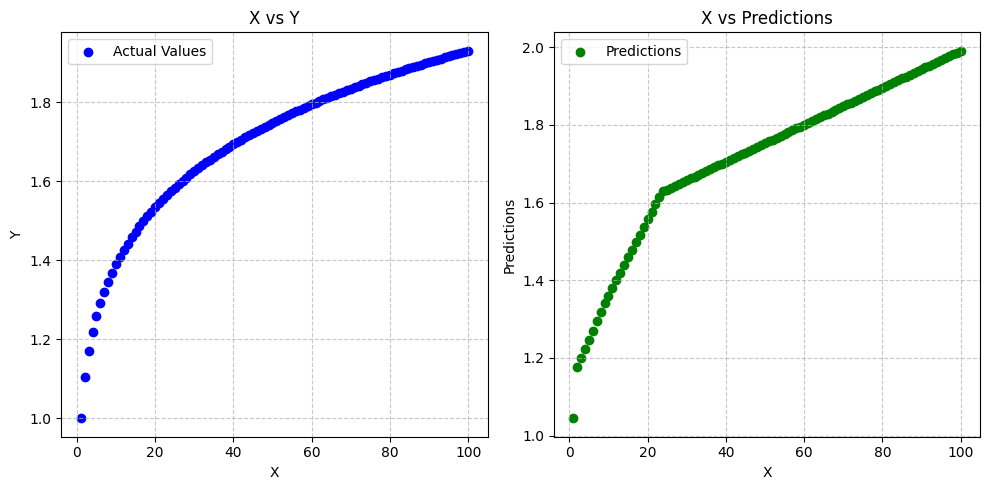

In [ ]:
import tensorflow as tf
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from tensorflow.python.keras.optimizers import *
import numpy as np


#Create dataset
#X is list of integers from 1 to 100 and Y as the roots, exact values used.
X=np.array([i for i in range(1,101)])
Y=np.array([i**(1/7) for i in range(1,101)])
#split into input (X) and output (y)
X = X*1.0
Y = Y*1.0

#define keras model
model = Sequential()

model.add(Dense(6,input_dim=1,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1))

#compile the keras model
opt = optimizers.Adam(learning_rate=0.001)
mse = tf.keras.losses.MeanSquaredError(
    reduction=tf.keras.losses.Reduction.SUM)
model.compile(loss=mse, optimizer=opt)



#fit the keras model on the dataset (CPU)
model.fit(X,Y,epochs=2000,batch_size=10, verbose=0)
model.summary()

#make class predictions with the model
predictions = model.predict(X)
#summarize the first 10 cases
for i in range(10):
    print('%s => %.2f (expected %.2f)' %(X[i].tolist(), predictions[i], Y[i]) )

import matplotlib.pyplot as plt
# Create the scatter plots
plt.figure(figsize=(10, 5))  # Set the figure size

# Plot X vs Y
plt.subplot(1, 2, 1)  # Create a subplot (1 row, 2 columns, 1st plot)
plt.scatter(X, Y, color='blue', label='Actual Values')
plt.title('X vs Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Plot X vs Predictions
plt.subplot(1, 2, 2)  # Create a subplot (1 row, 2 columns, 2nd plot)
plt.scatter(X, predictions, color='green', label='Predictions')
plt.title('X vs Predictions')
plt.xlabel('X')
plt.ylabel('Predictions')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Show the plots
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


Homework Problem 6: Use the Iris dataset and the neural network code shown in class to create a neural network model that takes sepal length as input and predicts petal length as output.[Hint: Use Numpy or Pandas to wrangle Iris dataset to help define your input and output. You are free to define the number of neurons in each layer.]

In [3]:
import tensorflow as tf
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from tensorflow.python.keras.optimizers import *
import numpy as np


#Import dataset
from sklearn import datasets
iris = datasets.load_iris()
X=np.array(iris.data[:,0])# sepal length is column 0
Y=np.array(iris.data[:,2])# petal length is column 2
#Continious variables
X = X*1.0
Y = Y*1.0

#define keras model
model = Sequential()

model.add(Dense(6,input_dim=1,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1))

#compile the keras model
opt = optimizers.Adam(learning_rate=0.01)
mse = tf.keras.losses.MeanSquaredError(
    reduction=tf.keras.losses.Reduction.SUM)
model.compile(loss=mse, optimizer=opt)



#fit the keras model on the dataset (CPU)
model.fit(X,Y,epochs=2000,batch_size=10, verbose=0)

#make class predictions with the model
predictions = model.predict(X)
#summarize the first 10 cases
for i in range(10):
    print('%s => %.2f (expected %.2f)' %(X[i].tolist(), predictions[i], Y[i]) )

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
5.1 => 1.86 (expected 1.40)
4.9 => 1.62 (expected 1.40)
4.7 => 1.35 (expected 1.30)
4.6 => 1.35 (expected 1.50)
5.0 => 1.86 (expected 1.40)
5.4 => 2.01 (expected 1.70)
4.6 => 1.35 (expected 1.40)
5.0 => 1.86 (expected 1.50)
4.4 => 1.35 (expected 1.40)
4.9 => 1.62 (expected 1.50)


<ipython-input-3-e7456df53449>:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('%s => %.2f (expected %.2f)' %(X[i].tolist(), predictions[i], Y[i]) )


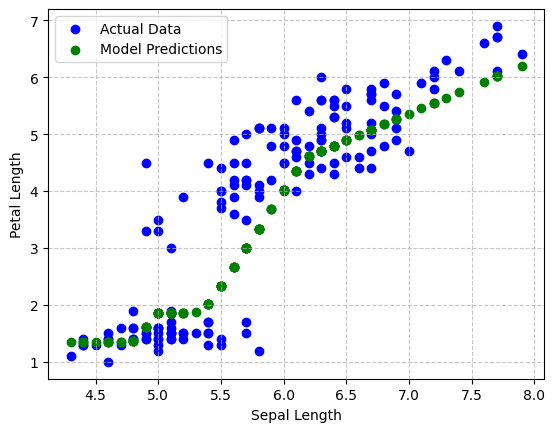

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the actual data and model predictions
plt.scatter(X, Y, color='blue', label='Actual Data')  # Actual data points in blue
plt.scatter(X, predictions, color='green', label='Model Predictions')  # Predictions in green

# Add labels, legend, and grid
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()
